# HPF data exploratory

In the last notebook we started by plotting one of the $\sim$410 available Goldilocks spectra.  In this notebook we will begin exploring the data through quantifying **line strengths**.  We can break the signals into a few distinct categories:

1. Earth Atmosphere: Absorption
2. Earth Atmosphere: Emission
3. Stellar Absorption
4. Exoplanet Atmosphere Transmission (if in-transit)

Our ultimate goal is to separate signals into these categories.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import glob
from astropy.io import fits
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set_context('paper')

HPF raw data gets processed with two different data reduction pipelines: *Goldilocks* and the default facility data reduction from the Penn State Instrument Team.  These two reductions have slightly different precisions, but for our purposes are essentially indistinguishable.  However, the data columns have different names, so they have to be handled differently.

In [2]:
goldilocks_files = glob.glob('../data/HPF/Helium-transit-data/**/Goldilocks*.fits', recursive=True)
pennstate_files = glob.glob('../data/HPF/Helium-transit-data/**/Slope*.fits', recursive=True)

Let's define a function that takes in a `fits` filename and returns a dataframe.

In [3]:
def get_goldilocks_dataframe(fn):
    """Return a pandas Dataframe given a Goldilocks FITS file name"""
    hdus = fits.open(fn)
    df_original = pd.DataFrame()
    for j in range(28):
        df = pd.DataFrame()
        for i in range(1, 10):
            name = hdus[i].name
            df[name] = hdus[i].data[j, :]
        df['order'] = j
        df_original = df_original.append(df, ignore_index=True)
    keep_mask = df_original[df_original.columns[0:6]] != 0.0
    df_original = df_original[keep_mask.all(axis=1)].reset_index(drop=True)
    
    return df_original

In [4]:
index = 129 # Pick a number in the range (0,410]
fn = goldilocks_files[index]

In [5]:
%time df = get_goldilocks_dataframe(fn)

Wall time: 265 ms


In [6]:
sns.set_palette("Reds", n_colors=28)

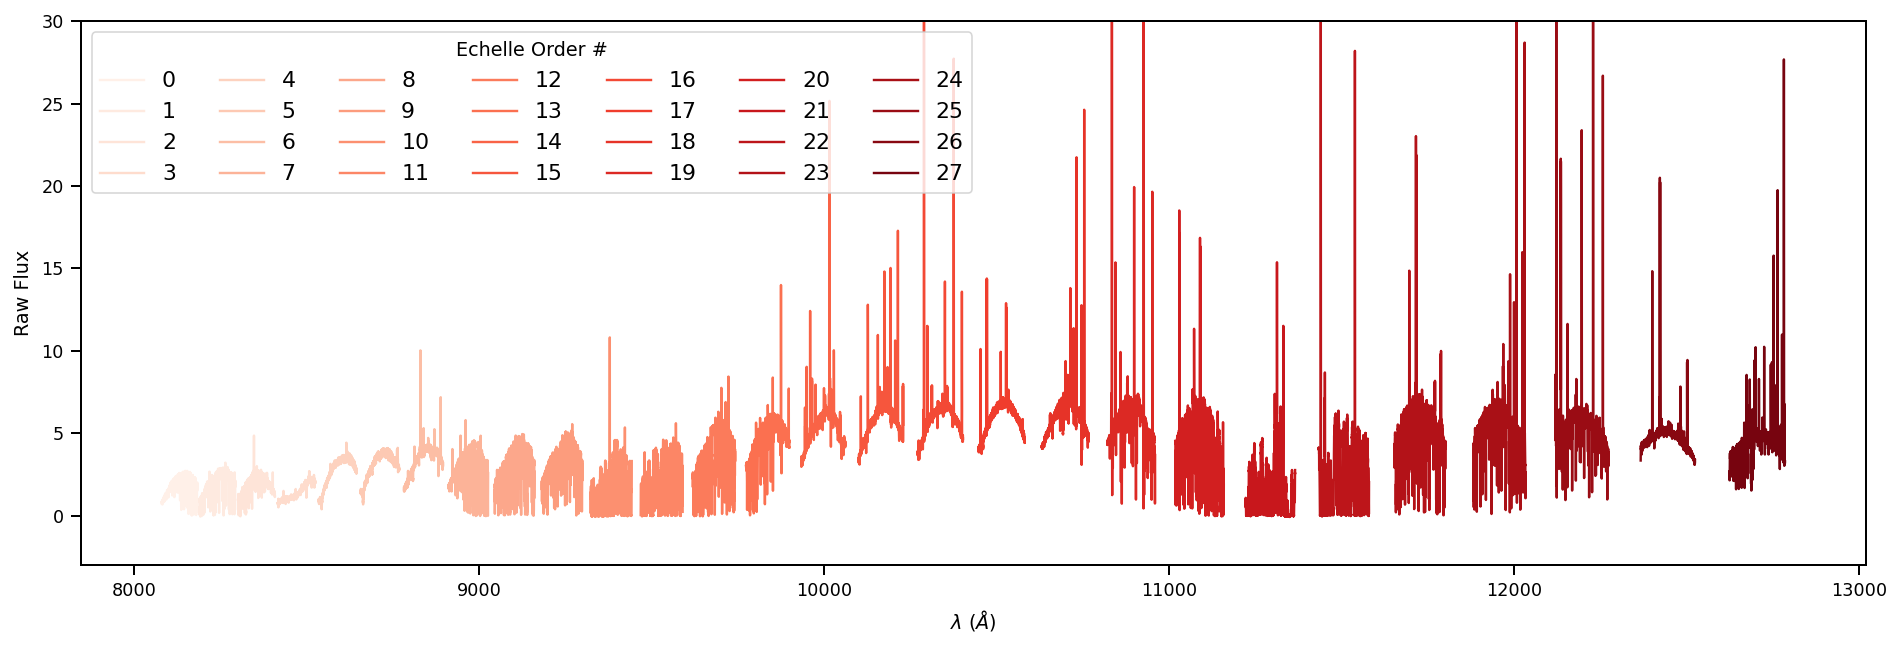

In [7]:
plt.figure(figsize=(16, 5))
for order, group in df.groupby('order'):
    plt.plot(group['Sci Wavl'], group['Sci Flux'], label=order);
plt.xlabel('$\lambda$ ($\AA$)');
plt.ylabel('Raw Flux')
plt.ylim(-3, 30)
plt.legend(ncol=7, title='Echelle Order #', fontsize=11);

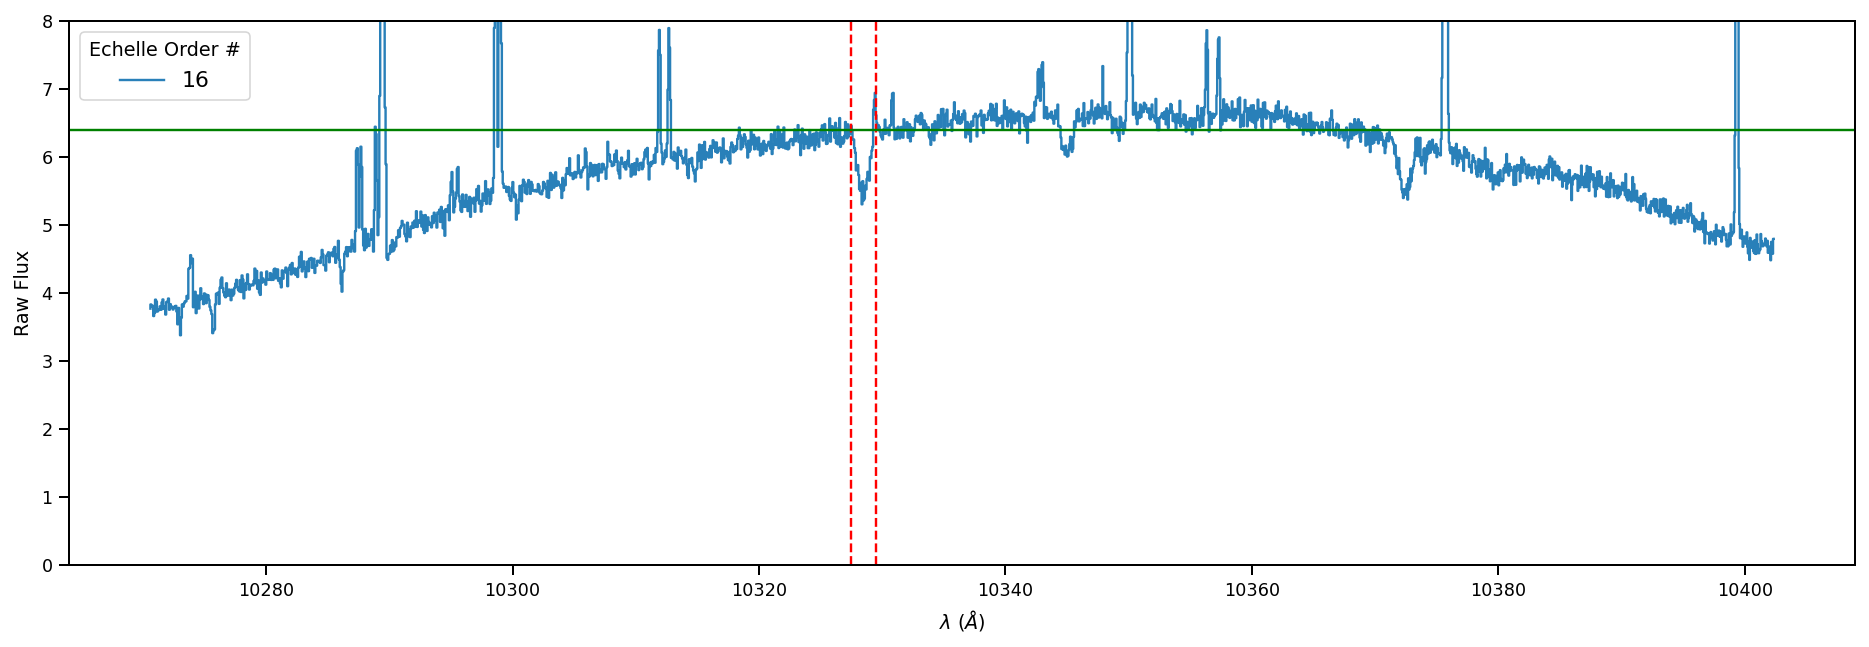

In [8]:
plt.figure(figsize=(16, 5))
order = 16
mask = df.order == order
plt.step(df['Sci Wavl'][mask], df['Sci Flux'][mask], label=order, color='#2980b9');
plt.xlabel('$\lambda$ ($\AA$)');
plt.ylabel('Raw Flux')
plt.legend(ncol=7, title='Echelle Order #', fontsize=11);
plt.ylim(0,8)
#plt.xlim(10320,10340)
wavelength1 = 10327.5
wavelength2 = 10329.5
plt.axvline(wavelength1,linestyle = 'dashed',color = 'red')
plt.axvline(wavelength2,linestyle = 'dashed',color = 'red')
plt.axhline(6.4,color = 'green')

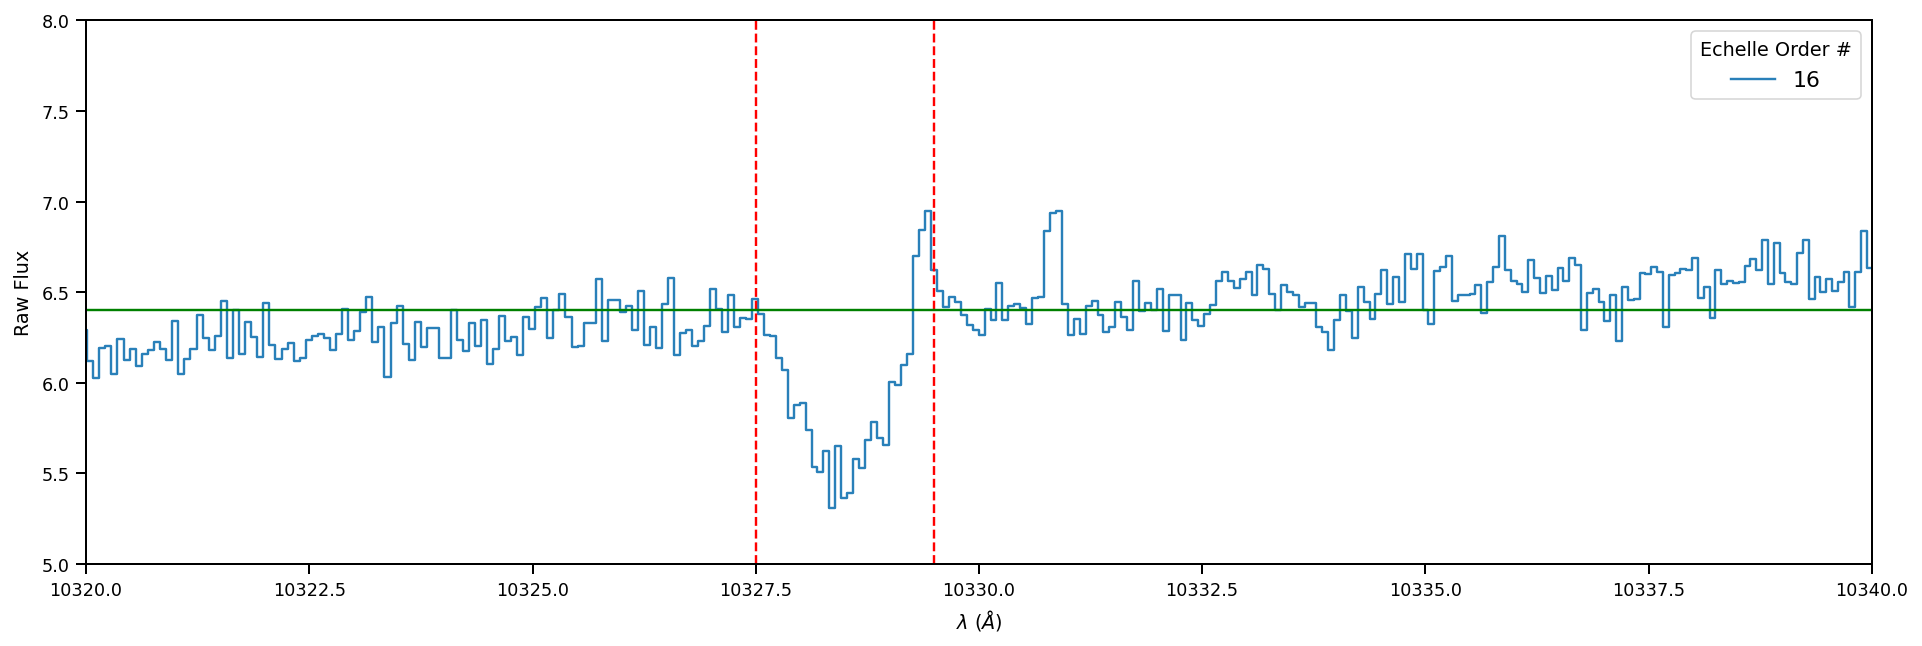

In [9]:
plt.figure(figsize=(16, 5))
order = 16
mask = df.order == order
plt.step(df['Sci Wavl'][mask], df['Sci Flux'][mask], label=order, color='#2980b9');
plt.xlabel('$\lambda$ ($\AA$)');
plt.ylabel('Raw Flux')
plt.legend(ncol=7, title='Echelle Order #', fontsize=11);
plt.ylim(5,8)
plt.xlim(10320,10340)
wavelength1 = 10327.5
wavelength2 = 10329.5
plt.axvline(wavelength1,linestyle = 'dashed',color = 'red')
plt.axvline(wavelength2,linestyle = 'dashed',color = 'red')
plt.axhline(6.4,color = 'green')

In [10]:
df

,Sci Flux,Sky Flux,Cal Flux,Sci Error,Sky Error,Cal Error,Sci Wavl,Sky Wavl,Cal Wavl,order
0,0.744486,0.025136,-0.043846,0.038043,0.018871,0.018966,8079.274245,8079.278406,8079.263591,0
1,0.758418,-0.039466,-0.060984,0.038201,0.017337,0.016992,8079.333701,8079.337859,8079.323054,0
2,0.849340,-0.004128,-0.052167,0.039846,0.018106,0.018572,8079.393149,8079.397304,8079.382508,0
3,0.823024,-0.038937,-0.030162,0.039362,0.017264,0.017784,8079.452590,8079.456742,8079.441956,0
4,0.780413,-0.007914,-0.009301,0.038595,0.018291,0.018460,8079.512024,8079.516172,8079.501395,0
...,...,...,...,...,...,...,...,...,...,...
57085,3.240874,0.402781,0.076902,0.071283,0.029977,0.020577,12785.311144,12785.310228,12785.300176,27
57086,3.322854,0.386475,0.101369,0.072296,0.029554,0.022060,12785.376205,12785.375306,12785.365236,27
57087,3.168449,0.461769,0.059263,0.070500,0.031358,0.020288,12785.441251,12785.440369,12785.430280,27
57088,3.247455,0.396482,0.151237,0.071639,0.029811,0.023059,12785.506283,12785.505418,12785.495311,27


Make a mask of where to look.

In [11]:
mask = (df['Sci Wavl'] > wavelength1) & (df['Sci Wavl'] < wavelength2)

Compute the area under the curve:

$\sum_{i=0}^N f_i - \sum_{i=0}^N 17.5$ =   


$\sum_{i=0}^N f_i - 17.5$

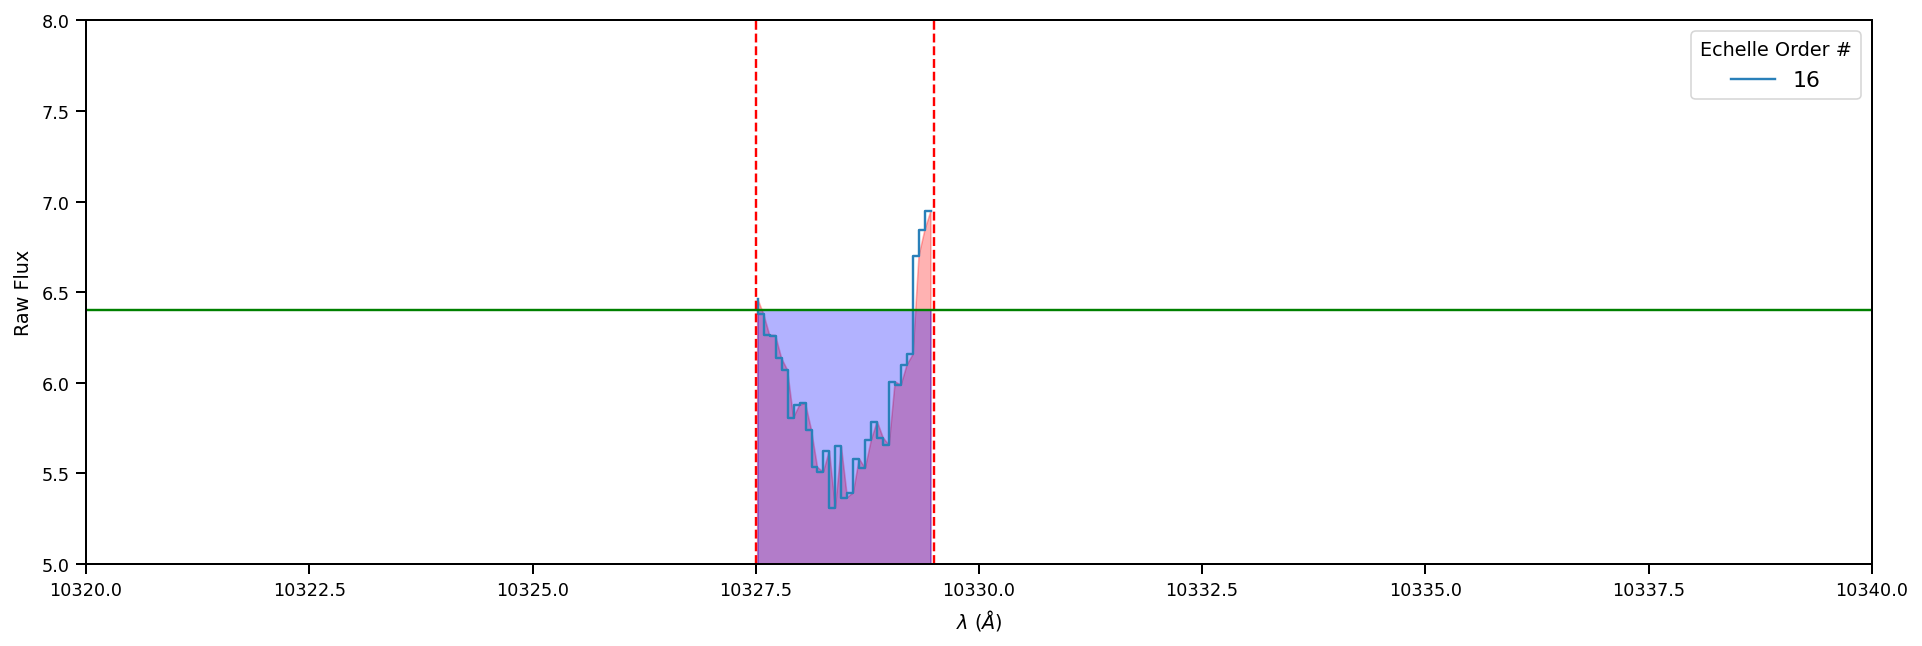

In [12]:
plt.figure(figsize=(16, 5))
order = 16
plt.step(df['Sci Wavl'][mask], df['Sci Flux'][mask], label=order, color='#2980b9');
plt.xlabel('$\lambda$ ($\AA$)');
plt.ylabel('Raw Flux')
plt.legend(ncol=7, title='Echelle Order #', fontsize=11);
plt.ylim(5,8)
plt.xlim(10320,10340)
wavelength1 = 10327.5
wavelength2 = 10329.5
plt.axvline(wavelength1,linestyle = 'dashed',color = 'red')
plt.axvline(wavelength2,linestyle = 'dashed',color = 'red')
plt.axhline(6.4,color = 'green')

plt.fill_between(df['Sci Wavl'][mask], df['Sci Flux'][mask], color='red', alpha=0.3)

plt.fill_between(df['Sci Wavl'][mask], 6.4, color='blue', alpha=0.3)

In [13]:
area = np.sum(df['Sci Flux'][mask] - 6.4)

In [14]:
area

-14.063948